<h1>Isaiah Pinto</h1>
<h3>October 6, 2023</h3>

<h3>Introduction</h3>

In this project, I will be exploring the use of Different Regressor machine learning algorithms such Linear Regression, Support Vector Regression, Decision Tree Regression, Random Forest Regression, K-Neighbors Regressor,and XGB Regressor for forecasting an online bike sharing application in Seoul, South Korea which we will be comparing from each others performance and see which has the best out of all of them.  In the dataset, there is a wide array of variables that can be utilized for this analysis such as Visibility, Rainfall, Snowfall, Holiday, Season, Temperature, Humidity, and more. In this analysis, I have converted some of these variables into categorical variables as I think it would be more useful for the model instead of numerical values. I have also conducted an exploratory data analysis to analyze the behavior of the dataset. I have also conducted two different types of models where I convert some of the values to categorical, and one that I have not to see how well the model performs.

<h3>Insights</h3>

From this project, I was able to see that XGB Regressor works well with forecasting the model.  The only downside of using XGB Regressor is that it is a black box model which will be very hard to explain as compared to other regressors in this study.  It is also worth noting that converting continuous variables to categorical variables did really well in this model where all of the models performed better when I converted these variables. We could improve the model by using XGB Regressor and finding the best parameters for this model using GridSearch CV. For this project, however, I only wanted to see the performance of each regressor for forecasting the rented bike count.

In [51]:
#Python Libraries for Analysis
import pandas as pd
import numpy as np

#Python Libraries for Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Python Libraries for Model Preparation
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import TimeSeriesSplit

#Python Libraries for Regression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")
warnings.simplefilter(action='ignore', category=FutureWarning)

In the section below we will be focusing on preparing the dataset for Exploratory Data Analysis

In [2]:
df0 = pd.read_csv("/Users/isaiahpinto/PycharmProjects/Personal-Projects/Bike Sales/SeoulBikeData.csv",encoding="latin-1")

In [3]:
df0.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,1/12/17,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,1/12/17,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,1/12/17,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,1/12/17,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,1/12/17,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [4]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [5]:
df0.duplicated().sum()

0

In [6]:
print(df0.isnull().sum())

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64


In [7]:
df0['Date'] = pd.to_datetime(df0['Date'],format='mixed',dayfirst=True)
df0.columns = df0.columns.str.replace(" " , "_").str.lower()
object_list = df0.describe(include='O').columns
for col in object_list:
    df0[col] = df0[col].astype('category')


In [8]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   date                       8760 non-null   datetime64[ns]
 1   rented_bike_count          8760 non-null   int64         
 2   hour                       8760 non-null   int64         
 3   temperature(°c)            8760 non-null   float64       
 4   humidity(%)                8760 non-null   int64         
 5   wind_speed_(m/s)           8760 non-null   float64       
 6   visibility_(10m)           8760 non-null   int64         
 7   dew_point_temperature(°c)  8760 non-null   float64       
 8   solar_radiation_(mj/m2)    8760 non-null   float64       
 9   rainfall(mm)               8760 non-null   float64       
 10  snowfall_(cm)              8760 non-null   float64       
 11  seasons                    8760 non-null   category      
 12  holida

In [9]:
df0.head()

,date,rented_bike_count,hour,temperature(°c),humidity(%),wind_speed_(m/s),visibility_(10m),dew_point_temperature(°c),solar_radiation_(mj/m2),rainfall(mm),snowfall_(cm),seasons,holiday,functioning_day
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


Adding date columns for some further analysis

In [10]:
def getdatetime(x):
    x['month'] = x['date'].dt.month
    x['month_name'] = x['date'].dt.month_name()
    x['month_name'] = x['month_name'].astype('category')
    x['day'] = x['date'].dt.day
    x['day_name'] = x['date'].dt.day_name()
    x['day_name'] = x['day_name'].astype('category')
    x['date_hour'] = x['date'] + pd.to_timedelta(x['hour'],unit='h')
    return x[['date','month','day','day_name','date_hour','month_name']]

In [11]:
getdatetime(df0)

,date,month,day,day_name,date_hour,month_name
0,2017-12-01,12,1,Friday,2017-12-01 00:00:00,December
1,2017-12-01,12,1,Friday,2017-12-01 01:00:00,December
2,2017-12-01,12,1,Friday,2017-12-01 02:00:00,December
3,2017-12-01,12,1,Friday,2017-12-01 03:00:00,December
4,2017-12-01,12,1,Friday,2017-12-01 04:00:00,December
...,...,...,...,...,...,...
8755,2018-11-30,11,30,Friday,2018-11-30 19:00:00,November
8756,2018-11-30,11,30,Friday,2018-11-30 20:00:00,November
8757,2018-11-30,11,30,Friday,2018-11-30 21:00:00,November
8758,2018-11-30,11,30,Friday,2018-11-30 22:00:00,November


We have to make a combination of date and hour to become our index since we will be using a time series forecasting

In [12]:
df0 = df0.set_index('date_hour')

In [13]:
df0.describe()

,date,rented_bike_count,hour,temperature(°c),humidity(%),wind_speed_(m/s),visibility_(10m),dew_point_temperature(°c),solar_radiation_(mj/m2),rainfall(mm),snowfall_(cm),month,day
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,2018-05-31 23:59:59.999999744,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,6.526027,15.720548
min,2017-12-01 00:00:00,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,2018-03-02 00:00:00,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,4.000000,8.000000
50%,2018-06-01 00:00:00,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,7.000000,16.000000
75%,2018-08-31 00:00:00,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,10.000000,23.000000
max,2018-11-30 00:00:00,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000,12.000000,31.000000
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,3.448048,8.796749


In [14]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8760 entries, 2017-12-01 00:00:00 to 2018-11-30 23:00:00
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   date                       8760 non-null   datetime64[ns]
 1   rented_bike_count          8760 non-null   int64         
 2   hour                       8760 non-null   int64         
 3   temperature(°c)            8760 non-null   float64       
 4   humidity(%)                8760 non-null   int64         
 5   wind_speed_(m/s)           8760 non-null   float64       
 6   visibility_(10m)           8760 non-null   int64         
 7   dew_point_temperature(°c)  8760 non-null   float64       
 8   solar_radiation_(mj/m2)    8760 non-null   float64       
 9   rainfall(mm)               8760 non-null   float64       
 10  snowfall_(cm)              8760 non-null   float64       
 11  seasons                    8760 n

In [15]:
numerical_cols = list(df0.describe(include=['int64','float64']).columns)
categorical_cols = list(df0.describe(include='category').columns)

The graph below shows the overall sales trend of the rented bike counts.  You will notice that there are certain days where it hit 0 sales, this is mainly due to the days where the application is not functioning

<Axes: xlabel='date_hour'>

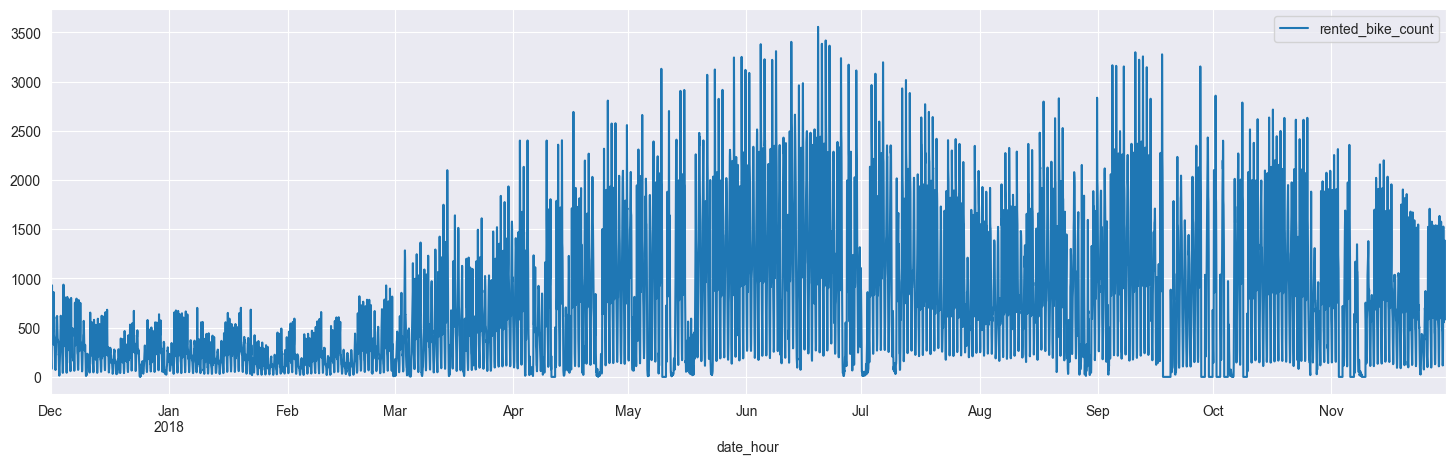

In [56]:
fig,axs = plt.subplots(1,1,figsize=(18,5))
df0[['rented_bike_count']].plot(kind='line',ax=axs)

In [16]:
def to_proper_case(x):
    x = x.replace("_"," ").title()
    return x

Creating a function that conducts analysis on each of our variables

In [17]:
def univariate_analysis(col):
    fig, axs = plt.subplots(1,2,figsize=(10,5))
    
    sns.histplot(data=df0, x=col,bins= 30,ax=axs[0],kde=True)
    axs[0].set_title(f'Distribution of {col} values')
    
    sns.boxplot(data=df0, x=col,ax=axs[1])
    axs[1].set_title(f'Distribution of {col} values')
    plt.show()
    
    skewness = df0[col].skew()
    
    if skewness > 0:
        print(f'The {to_proper_case(col)} values has positive skewness of {skewness} ---> Skewed to the right')
    elif skewness <0:
        print(f'The {to_proper_case(col)} values has negative skewness of {skewness} ---> Skewed to the left')
    else:
        print(f'The {to_proper_case(col)} value is normally distributed')
    dicts[col] = skewness

1. Univariate Analysis of Rented Bike Count.


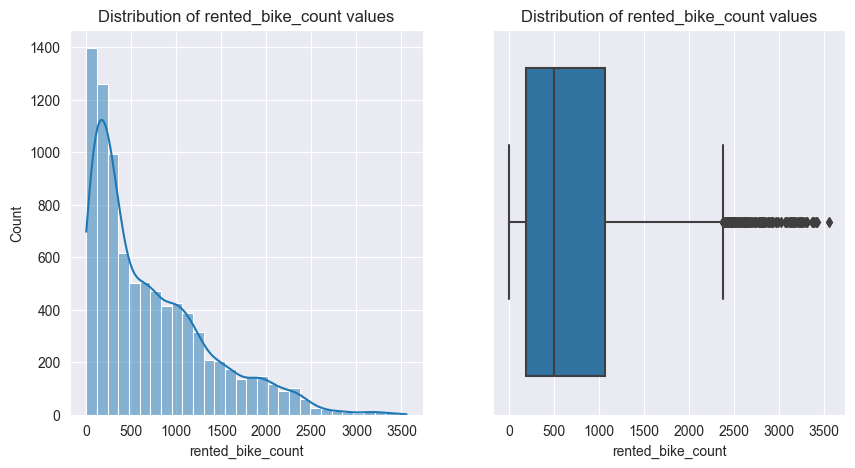

The Rented Bike Count values has positive skewness of 1.1534281773679014 ---> Skewed to the right
2. Univariate Analysis of Hour.


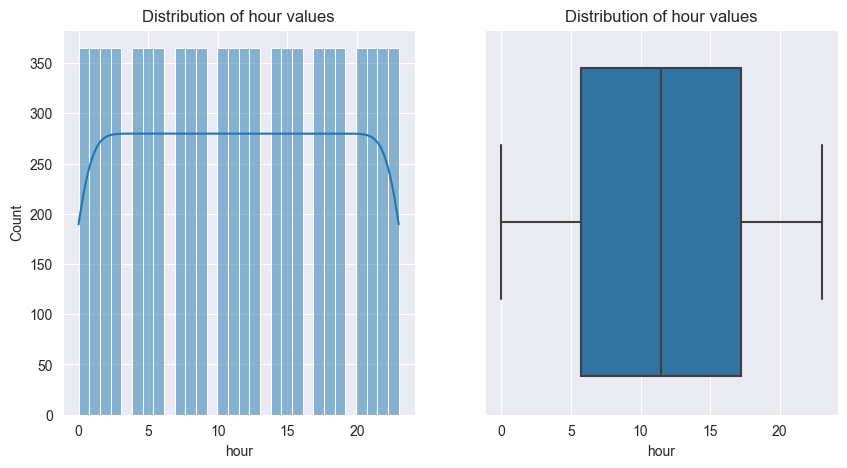

The Hour value is normally distributed
3. Univariate Analysis of Temperature(°C).


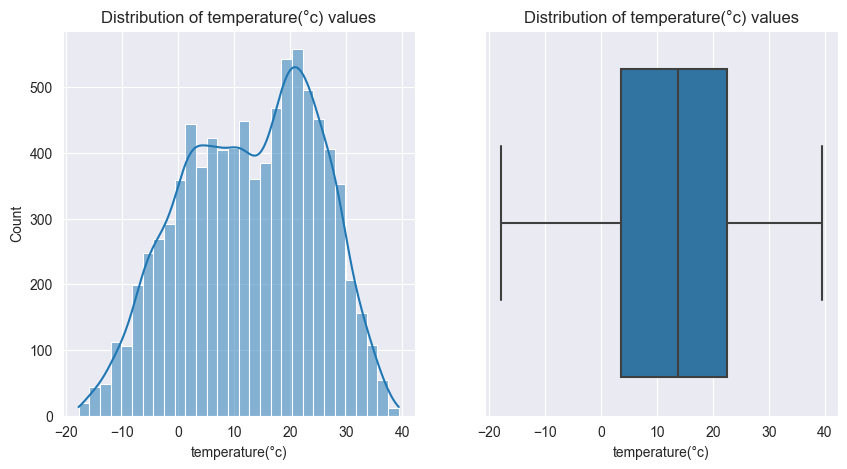

The Temperature(°C) values has negative skewness of -0.19832553450003293 ---> Skewed to the left
4. Univariate Analysis of Humidity(%).


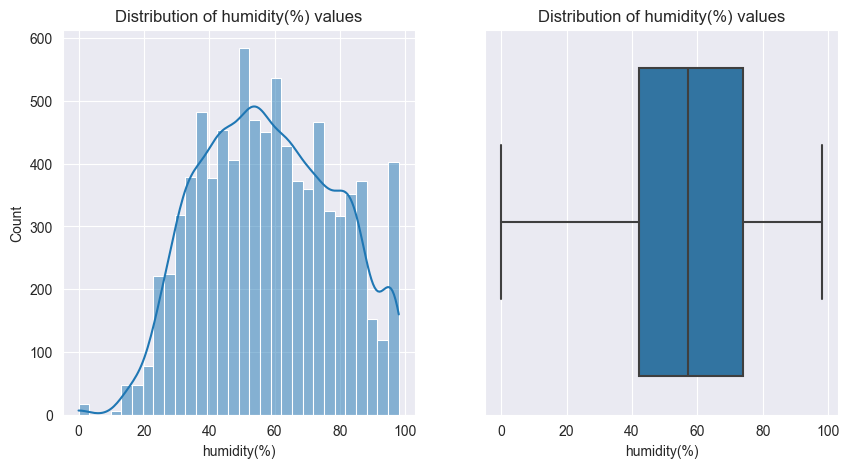

The Humidity(%) values has positive skewness of 0.05957897257708239 ---> Skewed to the right
5. Univariate Analysis of Wind Speed (M/S).


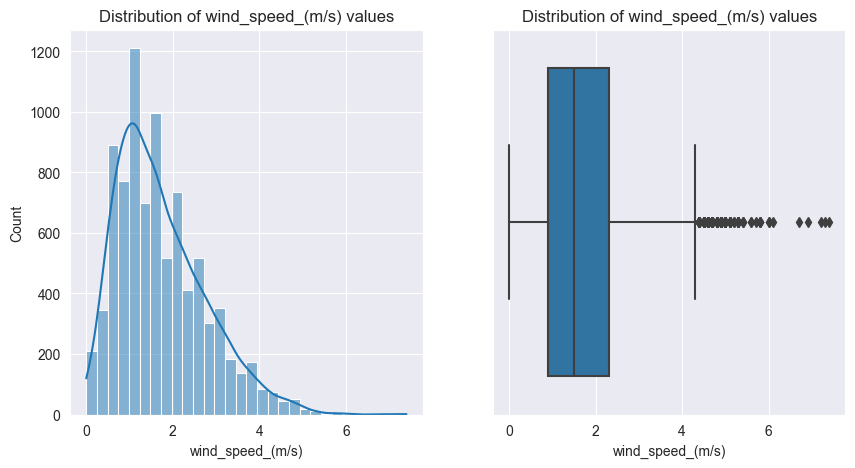

The Wind Speed (M/S) values has positive skewness of 0.8909547980299266 ---> Skewed to the right
6. Univariate Analysis of Visibility (10M).


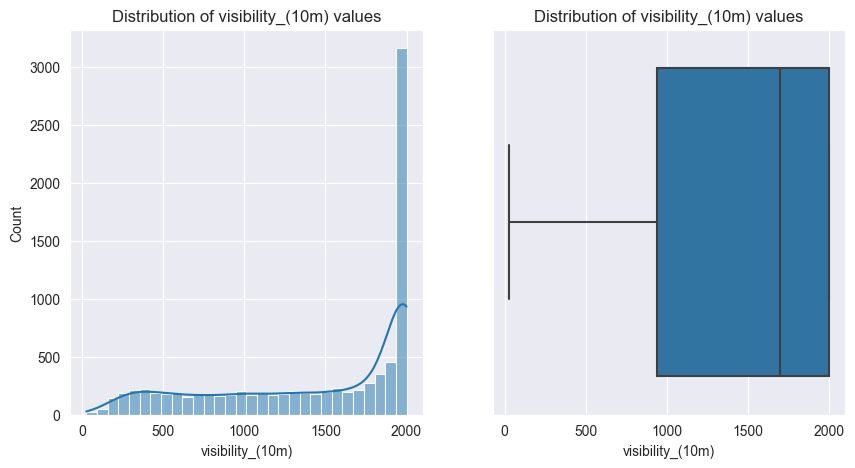

The Visibility (10M) values has negative skewness of -0.7017864489502947 ---> Skewed to the left
7. Univariate Analysis of Dew Point Temperature(°C).


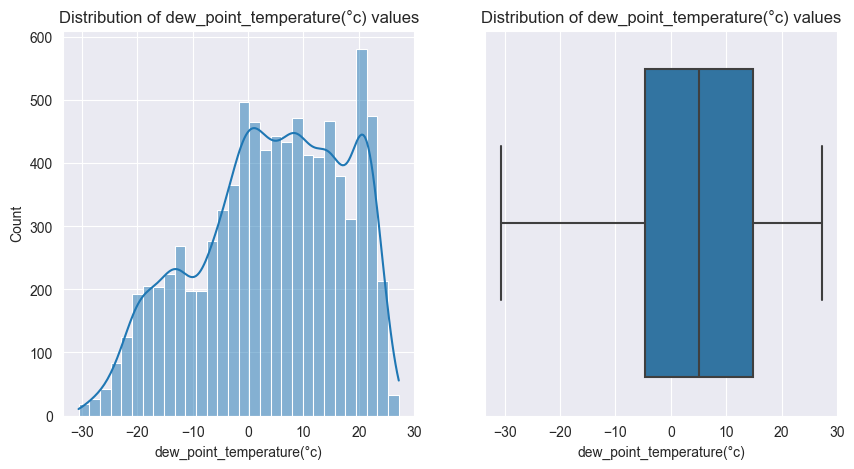

The Dew Point Temperature(°C) values has negative skewness of -0.3672984396624286 ---> Skewed to the left
8. Univariate Analysis of Solar Radiation (Mj/M2).


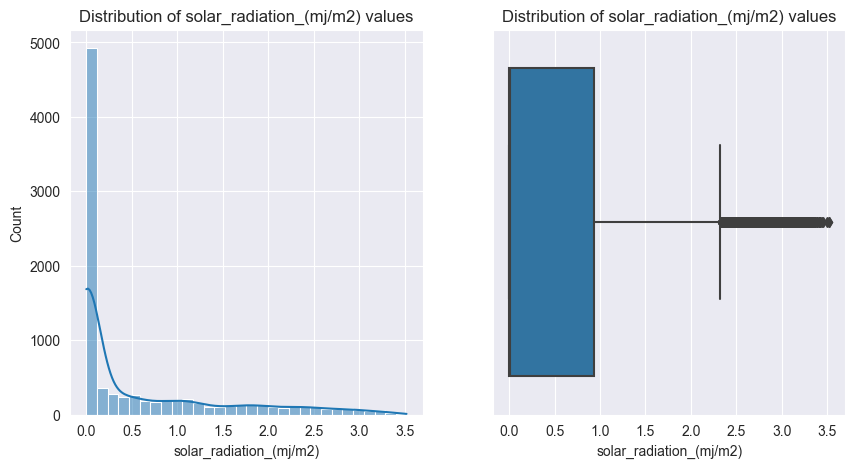

The Solar Radiation (Mj/M2) values has positive skewness of 1.5040397173602802 ---> Skewed to the right
9. Univariate Analysis of Rainfall(Mm).


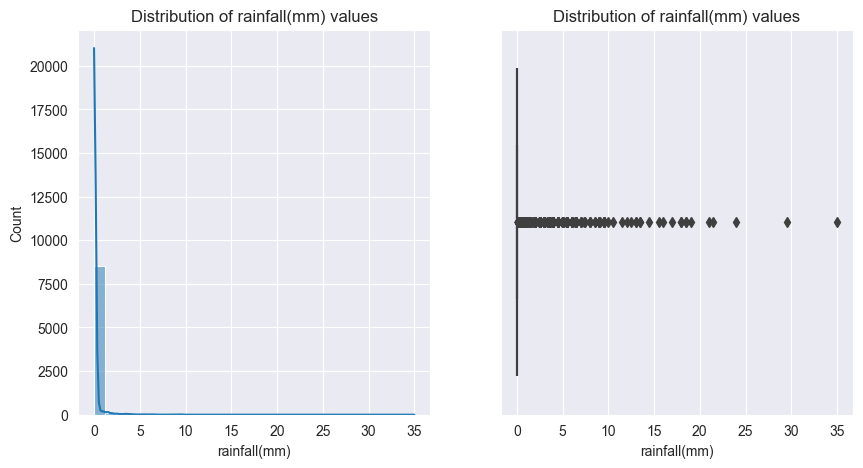

The Rainfall(Mm) values has positive skewness of 14.533232242546704 ---> Skewed to the right
10. Univariate Analysis of Snowfall (Cm).


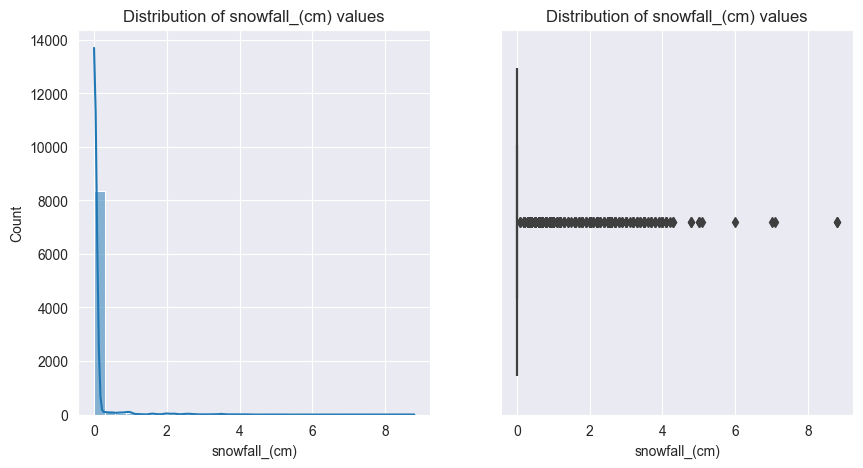

The Snowfall (Cm) values has positive skewness of 8.440800781484777 ---> Skewed to the right


In [18]:
dicts={}
a=1
for col in numerical_cols:
    print(f'{a}. Univariate Analysis of {to_proper_case(col)}.')
    univariate_analysis(col)
    print("==="*30)
    a+=1

Observations:
1. Our target variable (Rented Bike Count) is following somehow a logarithmic distribution.  There are also outliers present in the box plot, but since these are actual data, I will not be removing them.
2. There are several variables that were heavily skewed to the right such as Rainfall, Snowfall, and Solar Radiation. We will be converting majority of these variables into categorical as it will be easier to interpret as well
3. Humidity variable follows somehow a normal distribution and is neither skewed to the right or to the left.

In [19]:
skewness_df = pd.DataFrame.from_dict(dicts,orient='index')
skewness_df = skewness_df.rename(columns={0:'Skewness Value'})
skewness_df = skewness_df.reset_index()

In [20]:
skewness_df

,index,Skewness Value
0,rented_bike_count,1.153428
1,hour,0.000000
2,temperature(°c),-0.198326
3,humidity(%),0.059579
4,wind_speed_(m/s),0.890955
5,visibility_(10m),-0.701786
6,dew_point_temperature(°c),-0.367298
7,solar_radiation_(mj/m2),1.504040
8,rainfall(mm),14.533232
9,snowfall_(cm),8.440801


Creating a function that compares the variable and its relationship to the target variable rented bike count.

In [21]:
def bivariate_numerical(col):
    fig,axs = plt.subplots(1,2,figsize=(10,5))
    
    sns.scatterplot(data = df0, x=col,y='rented_bike_count',ax=axs[0])
    axs[0].set_title(f'Regression Plot between {to_proper_case(col)} and Rented Bike Count',fontsize=9)
    
    sns.heatmap(data=df0[[col,'rented_bike_count']].corr(), annot=True,ax=axs[1])
    axs[1].set_title(f'Heatmap between {to_proper_case(col)} and Rented Bike Count',fontsize=9)
    plt.show()

1. Bivariate Analysis of Hour and Rented Bike Count


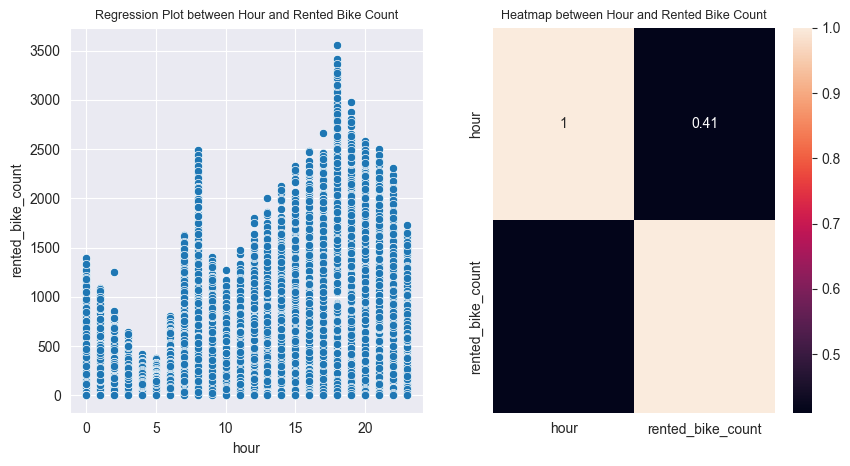

2. Bivariate Analysis of Temperature(°C) and Rented Bike Count


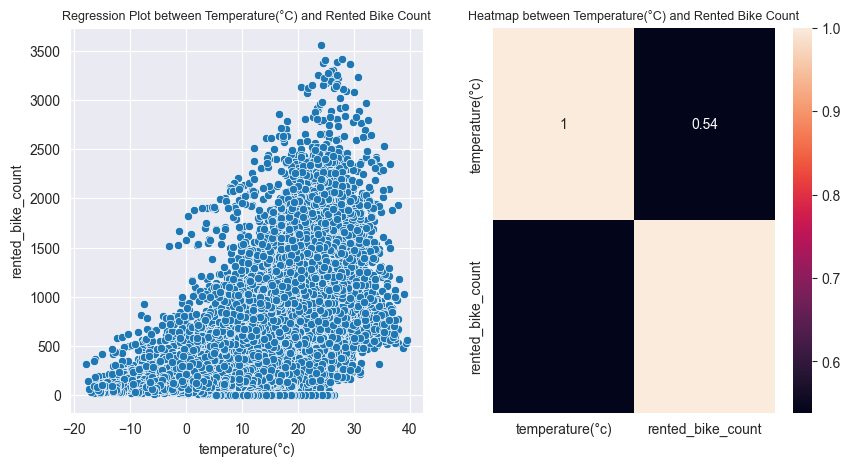

3. Bivariate Analysis of Humidity(%) and Rented Bike Count


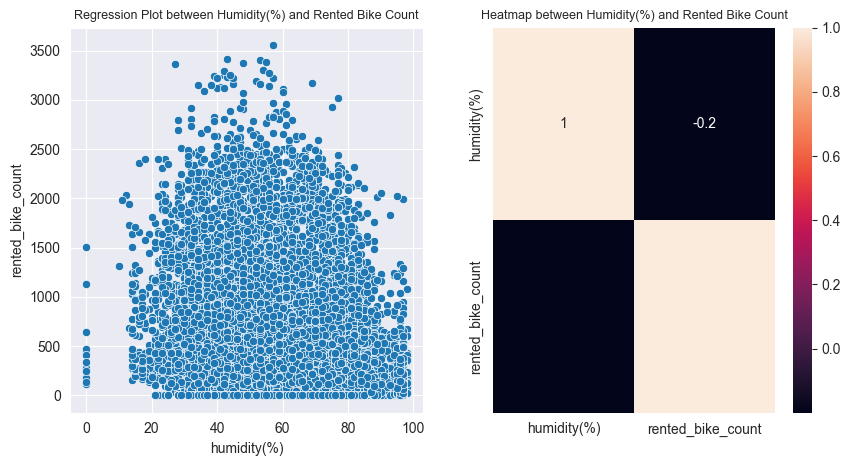

4. Bivariate Analysis of Wind Speed (M/S) and Rented Bike Count


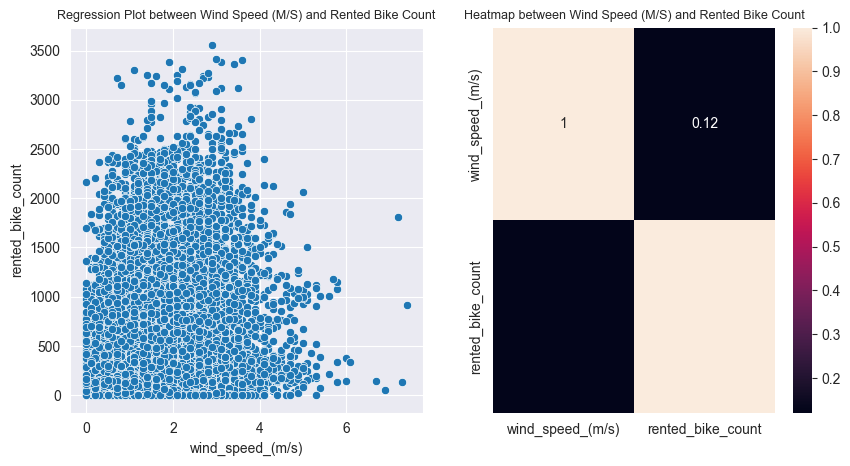

5. Bivariate Analysis of Visibility (10M) and Rented Bike Count


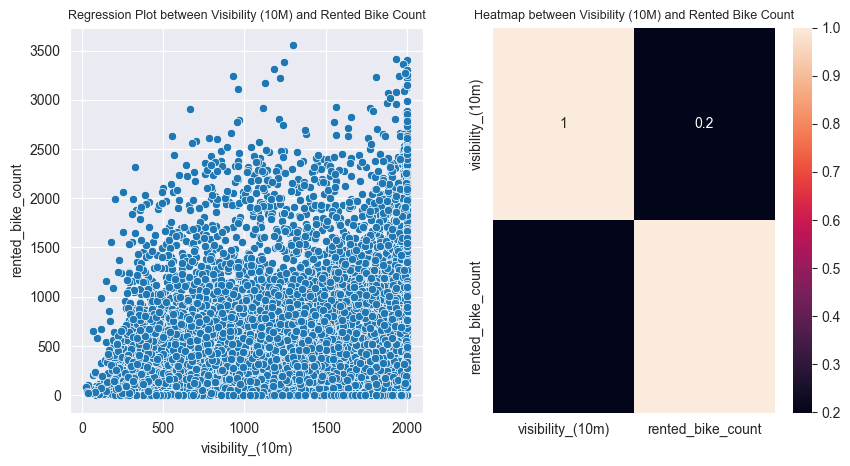

6. Bivariate Analysis of Dew Point Temperature(°C) and Rented Bike Count


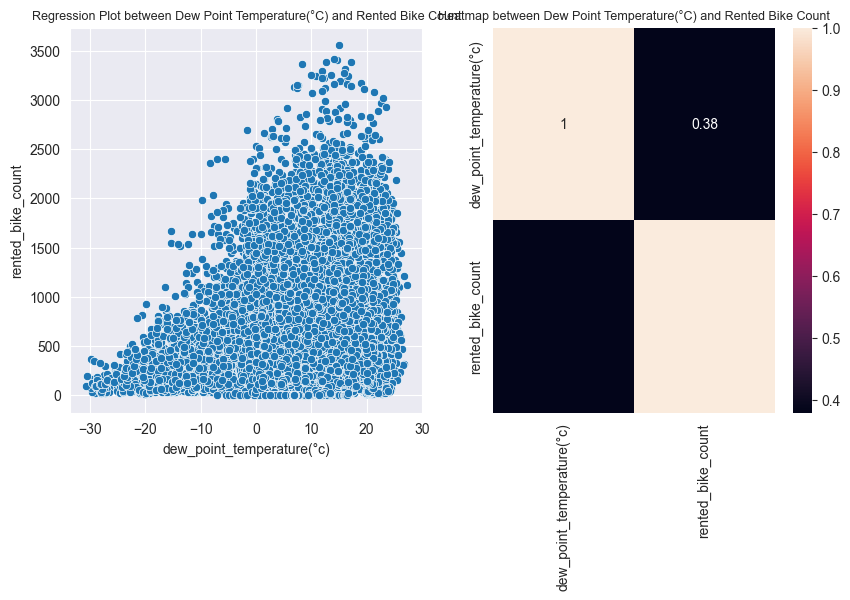

7. Bivariate Analysis of Solar Radiation (Mj/M2) and Rented Bike Count


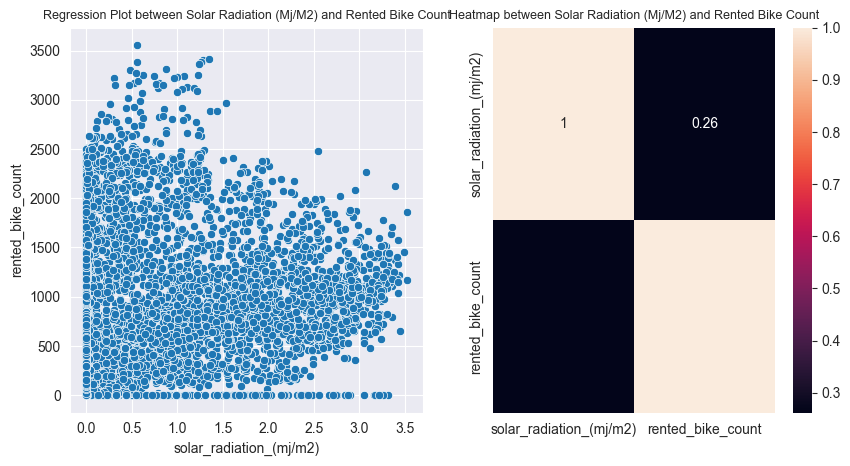

8. Bivariate Analysis of Rainfall(Mm) and Rented Bike Count


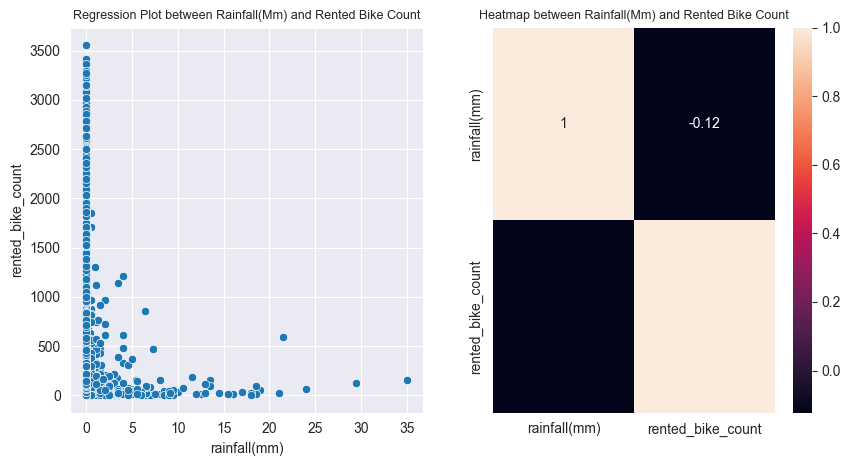

9. Bivariate Analysis of Snowfall (Cm) and Rented Bike Count


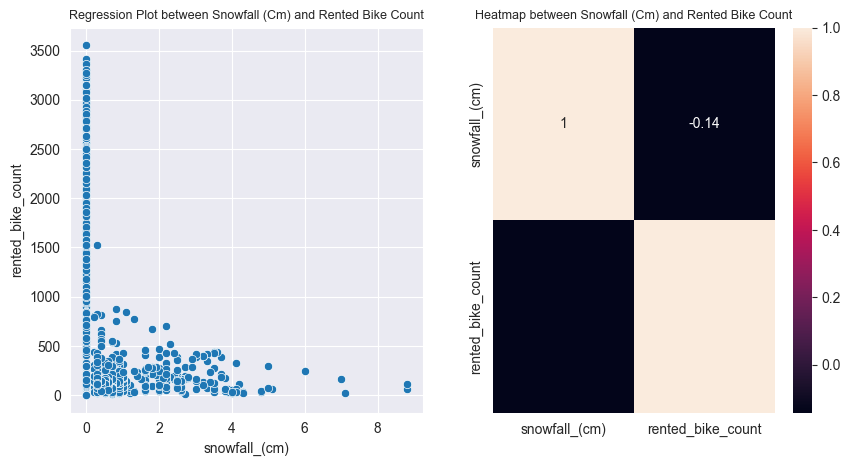

In [22]:
a=1
for col in numerical_cols[1:]:
    print(f'{a}. Bivariate Analysis of {to_proper_case(col)} and Rented Bike Count')
    bivariate_numerical(col)
    a+=1

Observations:
1. Majority of the variables in the dataset have no clear relationship to the target variable. It would seem that Hour, and temperature has the clearest relationship where it is somehow having a linear relationship.
2. A lot are uniformly distributed like solar radiation, windspeed, humidity, and visibility.

In this function below we will be creating plots that compares the different categorical variables that we have and its relation to the target variable

In [23]:
month_order = ['January','February','March','April','May','June','July','August','September','October','November','December']
day_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
def bivariate_categorical(col):
    fig,axs = plt.subplots(1,1,figsize=(10,4.5))
    if col == 'month_name':
        sns.boxplot(data = df0, x=col,y='rented_bike_count',order = month_order,ax=axs,showfliers=False)
        axs.set_title(f'Box Plot between {to_proper_case(col)} and Rented Bike Count')
        plt.show()
    elif col =='day_name':
        sns.boxplot(data = df0, x=col,y='rented_bike_count',order = day_order,ax=axs,showfliers=False)
        axs.set_title(f'Box Plot between {to_proper_case(col)} and Rented Bike Count')
        plt.show()
    else:
        sns.boxplot(data = df0, x=col,y='rented_bike_count',ax=axs,showfliers=False)
        axs.set_title(f'Box Plot between {to_proper_case(col)} and Rented Bike Count')
        plt.show()

1. Bivariate Analysis of Seasons and Rented Bike Count


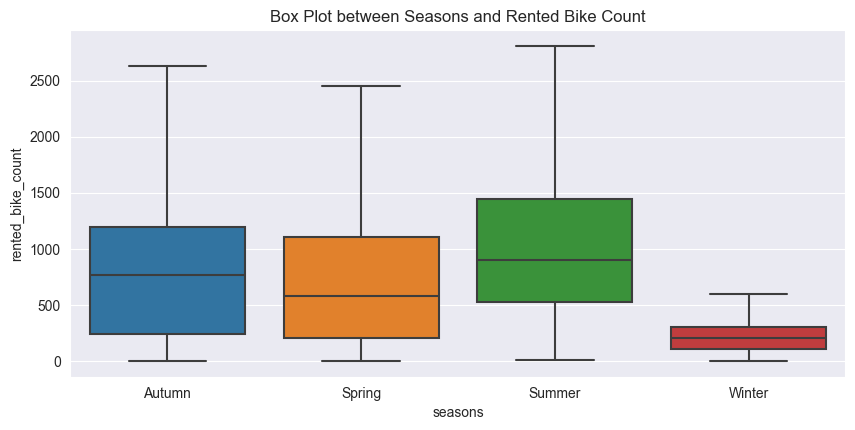

2. Bivariate Analysis of Holiday and Rented Bike Count


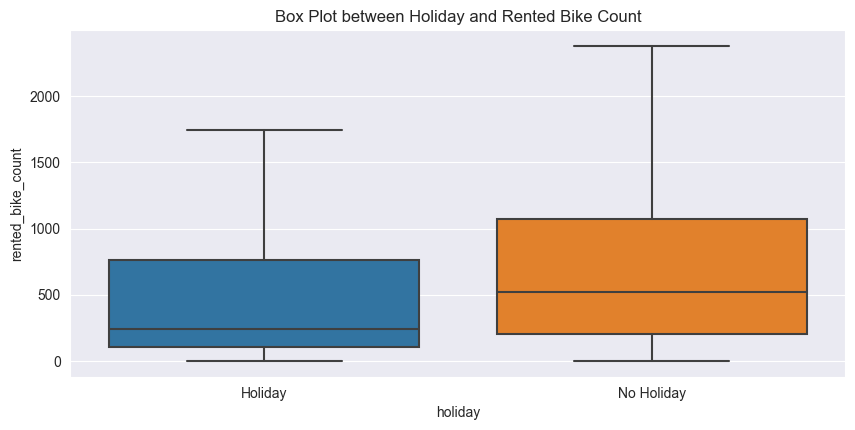

3. Bivariate Analysis of Functioning Day and Rented Bike Count


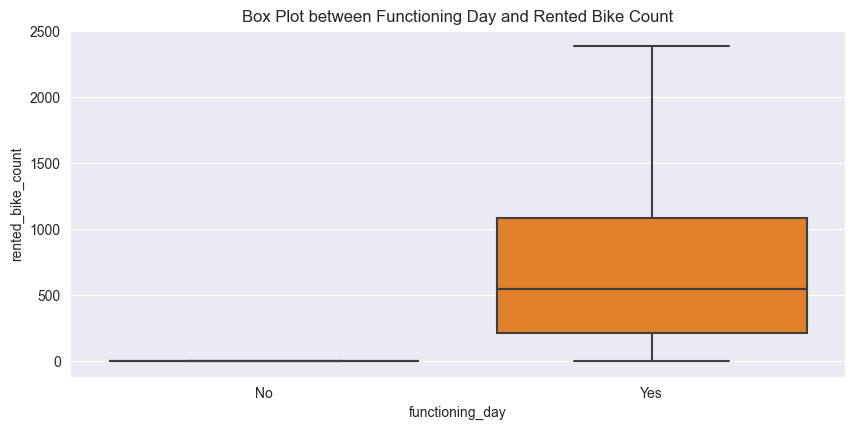

4. Bivariate Analysis of Month Name and Rented Bike Count


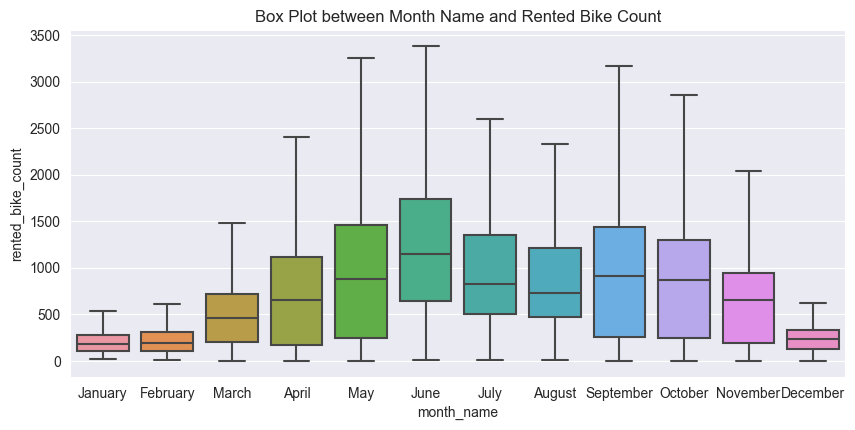

5. Bivariate Analysis of Day Name and Rented Bike Count


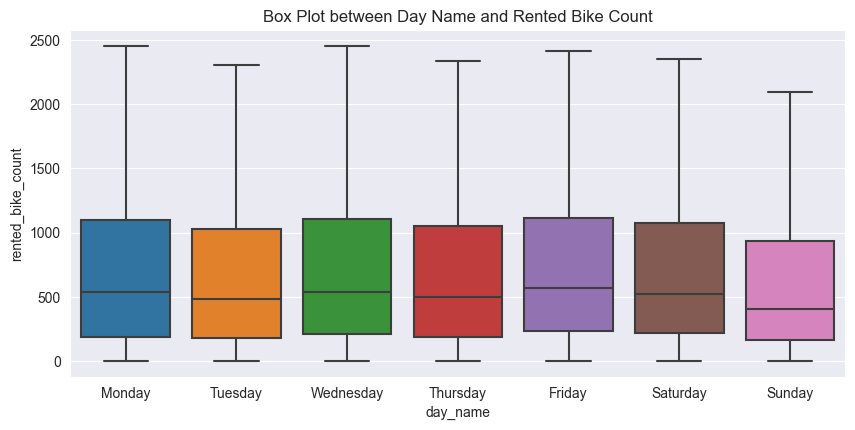

In [24]:
a=1
for col in categorical_cols[:]:
    print(f'{a}. Bivariate Analysis of {to_proper_case(col)} and Rented Bike Count')
    bivariate_categorical(col)
    print("==="*30)
    a+=1

Observations:
1. Across the different Seasons, Winter has the lowest spread of values which indicates that people rent bikes less during this particular season. This may be due to unsafe conditions overall
2. In comparing Holiday and No Holiday, I would expect that Holiday would have more people rent bikes, but apparently No Holiday has more users compared to Holiday.  This may be because a lot would just stay home during holidays, and professional might be working with no Holidays where they will use bikes instead of public transportation or cars
3. In the months of December to February is where the lowest spread of users. This coincides with Winter having the lowest number of people who rent bikes. June on the other hand has the highest amount of users for the application
4. In the different days, there are not significant differences with one another.  However, one thin to note is that Sunday has the lowest spread of users across all the different days

Getting ready for analysis
1. We will be doing two separate datasets where first is i did not convert some variables to categorical, and one that i did to see if there are any significant differences between the results
2. We wll be doing multiple models to see how each compares to one another.

In [25]:
df_converted = df0.copy()
df_retained = df0.copy()

We will start with the converted datasets where we will categorize rainfall, snowfall, and visibility through the functions below

In [26]:
#To categorize Rainfall that will be used later on
def rainfallclassification(dataframe):
    if dataframe['rainfall(mm)'] == 0:
        val = 'No Rain'
    elif 0 < dataframe['rainfall(mm)'] <= 2.5:
        val = 'Light'
    elif 2.5 < dataframe['rainfall(mm)'] <= 7.5:
        val = 'Moderate'
    elif 7.5 < dataframe['rainfall(mm)'] <= 50:
        val = 'Heavy'
    elif dataframe['rainfall(mm)'] > 50:
        val = 'Violent'
    return val

#To categorize Snowfall that will be used later on
def snowfallclass(dataframe):
    if dataframe['snowfall_(cm)'] == 0 :
        val = 'No Snow'
    elif 0 < dataframe['snowfall_(cm)'] <= 0.1:
        val = 'Light'
    elif 0.1 < dataframe['snowfall_(cm)'] <= 0.25:
        val = 'Moderate'
    elif dataframe['snowfall_(cm)'] > .25:
        val = 'Heavy'
    return val

#To categorize visibility that will be used later on
def visibilityclass(dataframe):
    if dataframe['visibility_(10m)'] < 400:
        val = 'Low'
    elif 400 <= dataframe['visibility_(10m)'] <= 1000:
        val = 'Moderate'
    elif dataframe['visibility_(10m)'] > 1000:
        val = 'High'
    return val

In [27]:
df_converted['rainfall_category'] = df_converted.apply(rainfallclassification, axis=1).astype('category')
df_converted['snowfall_category'] = df_converted.apply(snowfallclass,axis=1).astype('category')
df_converted['visibility_category'] = df_converted.apply(visibilityclass,axis=1).astype('category')
df_converted.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8760 entries, 2017-12-01 00:00:00 to 2018-11-30 23:00:00
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   date                       8760 non-null   datetime64[ns]
 1   rented_bike_count          8760 non-null   int64         
 2   hour                       8760 non-null   int64         
 3   temperature(°c)            8760 non-null   float64       
 4   humidity(%)                8760 non-null   int64         
 5   wind_speed_(m/s)           8760 non-null   float64       
 6   visibility_(10m)           8760 non-null   int64         
 7   dew_point_temperature(°c)  8760 non-null   float64       
 8   solar_radiation_(mj/m2)    8760 non-null   float64       
 9   rainfall(mm)               8760 non-null   float64       
 10  snowfall_(cm)              8760 non-null   float64       
 11  seasons                    8760 n

In [28]:
numerical_cols = list(df_converted.describe(include=['int64','float64']).columns)
categorical_cols = list(df_converted.describe(include='category').columns)

<Axes: >

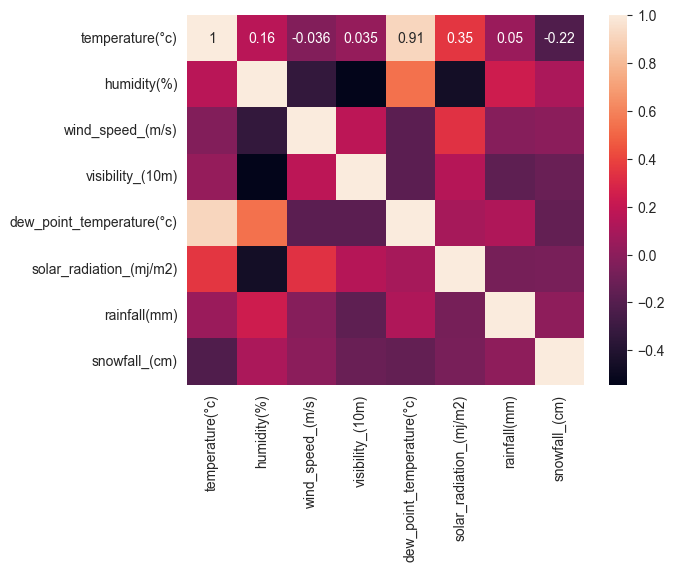

In [29]:
sns.heatmap(data=df_converted[numerical_cols[2:]].corr(),annot=True)

In [30]:
df_converted.columns

Index(['date', 'rented_bike_count', 'hour', 'temperature(°c)', 'humidity(%)',
       'wind_speed_(m/s)', 'visibility_(10m)', 'dew_point_temperature(°c)',
       'solar_radiation_(mj/m2)', 'rainfall(mm)', 'snowfall_(cm)', 'seasons',
       'holiday', 'functioning_day', 'month', 'month_name', 'day', 'day_name',
       'rainfall_category', 'snowfall_category', 'visibility_category'],
      dtype='object')

In [31]:
drop= ['date','dew_point_temperature(°c)','rainfall(mm)', 'visibility_(10m)','snowfall_(cm)','month_name','day_name']
df_converted_model = df_converted.drop(drop,axis=1)
df_converted_model = pd.get_dummies(df_converted_model,drop_first = True)

Visualizing the train test splits. I will be using a Time Series Split since I want to make sure that no future data will be used for training and will be organized in such a way that is training everytime new data comes in.

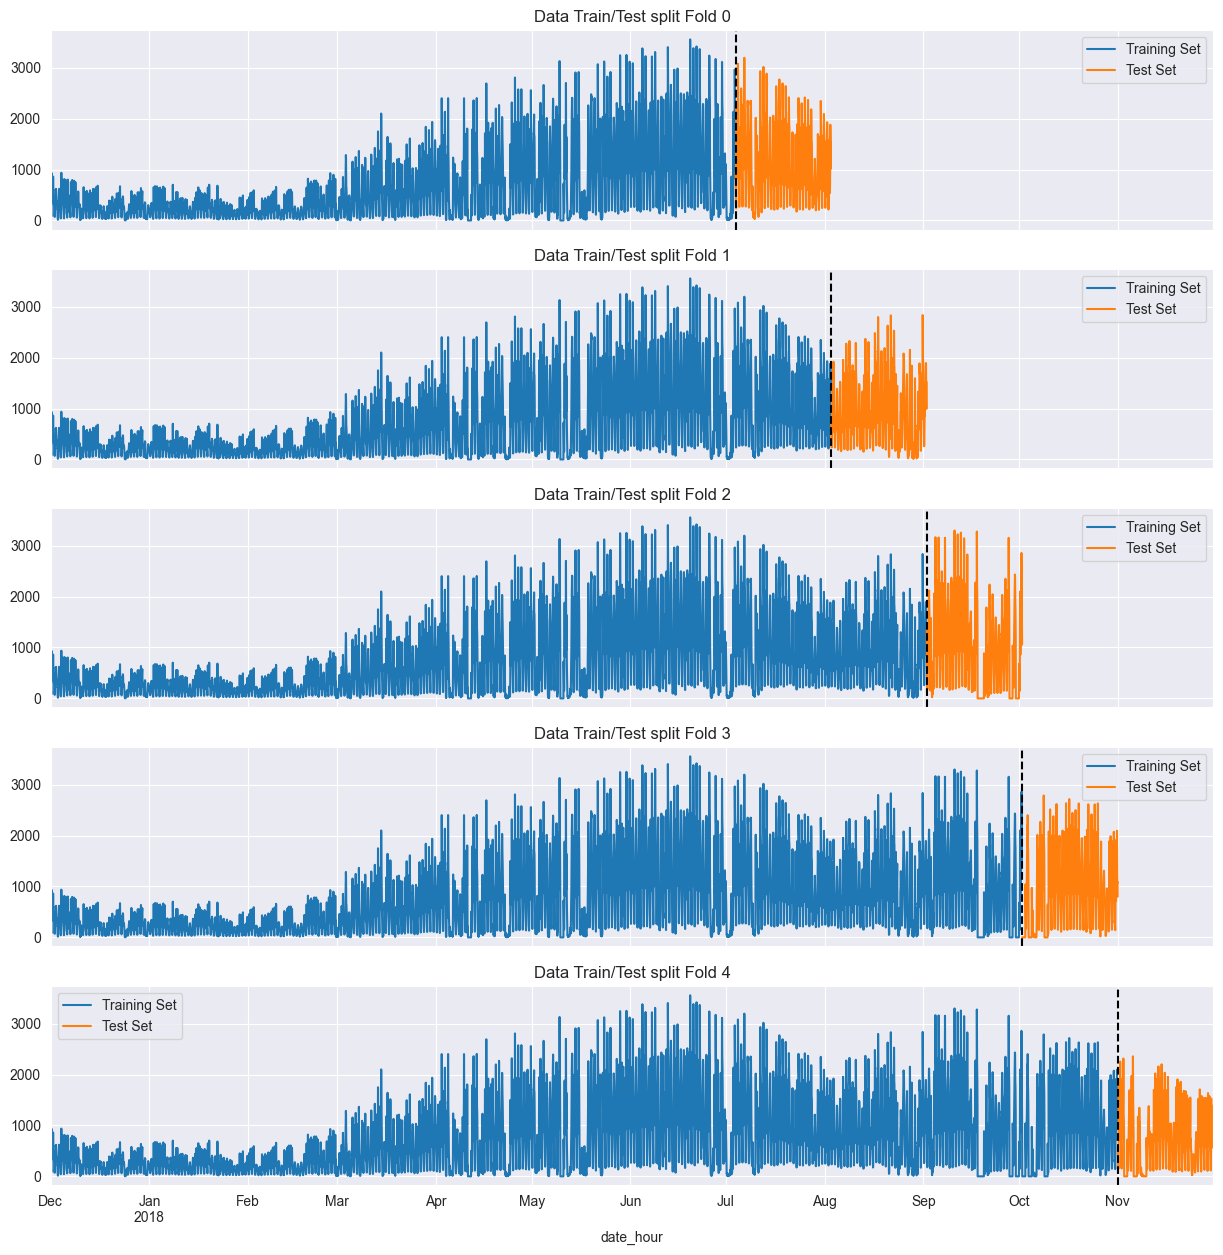

In [32]:
tss = TimeSeriesSplit(n_splits = 5, test_size=720, gap = 1)

fig,axs = plt.subplots(5,1,figsize=(15,15), sharex=True)
fold = 0

for train_idx,val_idx in tss.split(df_converted_model):
    train = df_converted_model.iloc[train_idx]
    test= df_converted_model.iloc[val_idx]
    train['rented_bike_count'].plot(ax=axs[fold], title = f'Data Train/Test split Fold {fold}')
    test['rented_bike_count'].plot(ax=axs[fold])
    axs[fold].axvline(test.index.min(),color='black', ls='--')
    axs[fold].legend(['Training Set','Test Set'])
    fold += 1
plt.show()

Creating a function to train and test a model that returns the metrics for the regressor

In [36]:
def train_model(model,X_train,y_train,X_test,y_test):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test,y_pred)
    r2score = r2_score(y_test,y_pred)
    return mse,r2score

In [37]:
#Defining the models that we will be using
lr = LinearRegression()
svr = SVR()
knn_r = KNeighborsRegressor()
dtr = DecisionTreeRegressor()
rfr = RandomForestRegressor()
xgb1 = XGBRegressor()

#Defining a dictionary that contains the name of the model, and regressor
regressors = {'Linear Regression': lr, 'Support Vector Regressor':svr,'K-Nearest Neighbors Regressor':knn_r,'Decision TreeRegressor':dtr,'Random Forest Regressor':rfr,'XGB Regressor':xgb1}


features = ['hour', 'temperature(°c)', 'humidity(%)',
       'wind_speed_(m/s)', 'solar_radiation_(mj/m2)', 'month', 'day',
       'seasons_Spring', 'seasons_Summer', 'seasons_Winter',
       'holiday_No Holiday', 'functioning_day_Yes', 'rainfall_category_Light',
       'rainfall_category_Moderate', 'rainfall_category_No Rain',
       'snowfall_category_Light', 'snowfall_category_Moderate',
       'snowfall_category_No Snow', 'visibility_category_Low',
       'visibility_category_Moderate']
target = ['rented_bike_count']

fold = 0
mse_scores=[]
rmse_scores = []
r2_scores =[]
#For loop that goes through each regressor items training the model across the different splits
for name, model in regressors.items():
    for train_idx,val_idx in tss.split(df_converted_model):
        train = df_converted_model.iloc[train_idx]
        test = df_converted_model.iloc[val_idx]
    
        X_train = train[features]
        y_train = train[target]
        X_test = test[features]
        y_test = test[target]
    
        fold_mse_scores = []
        fold_rmse_scores = []
        fold_r2_scores = []
    
        mse,r2score = train_model(model,X_train,y_train,X_test,y_test)
        
        fold_mse_scores.append(mse)
        fold_rmse_scores.append(np.sqrt(mse))
        fold_r2_scores.append(r2score)
        
    mse_scores.append(np.mean(fold_mse_scores))
    rmse_scores.append(np.sqrt(np.mean(fold_mse_scores)))
    r2_scores.append(np.mean(fold_r2_scores))

#Creating a dataframe with all the models and metrics
performance_converted = pd.DataFrame({'Models':regressors.keys(),'Mean Squared Error':mse_scores,'Root MSE':rmse_scores,'R2_Scores':r2_scores}).sort_values('R2_Scores',ascending=False)
performance_converted['Type'] ='Converted'
performance_converted

/Library/Python/3.9/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Python/3.9/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Python/3.9/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Python/3.9/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y =

,Models,Mean Squared Error,Root MSE,R2_Scores,Type
5,XGB Regressor,61628.728881,248.251342,0.735723,Converted
4,Random Forest Regressor,86657.775757,294.376928,0.628393,Converted
3,Decision TreeRegressor,143049.680556,378.219091,0.386572,Converted
0,Linear Regression,151456.719273,389.174407,0.350521,Converted
1,Support Vector Regressor,228120.693476,477.619821,0.021769,Converted
2,K-Nearest Neighbors Regressor,245404.539611,495.383225,-0.052348,Converted


From the dataframe above, we can see that XGB Regressor performed the best, followed by the Random forest Regressor. I have added a Type column since we will be combining this later on with the model that we did not convert columns to categorical variables.

In [38]:
drop= ['date','dew_point_temperature(°c)','month_name','day_name']
df_retained_model = df_retained.drop(drop,axis=1)
df_retained_model = pd.get_dummies(df_retained_model,drop_first=True)

We will be repeated the same methodology to non-converted columns as seen below

In [39]:
lr = LinearRegression()
svr = SVR()
knn_r = KNeighborsRegressor()
dtr = DecisionTreeRegressor()
rfr = RandomForestRegressor()
xgb1 = XGBRegressor()
regressors = {'Linear Regression': lr, 'Support Vector Regressor':svr,'K-Nearest Neighbors Regressor':knn_r,'Decision TreeRegressor':dtr,'Random Forest Regressor':rfr,'XGB Regressor':xgb1}

scaling = ['hour','temperature(°c)','humidity(%)','wind_speed_(m/s)','solar_radiation_(mj/m2)','month','day']
std_scaler = StandardScaler()

features = ['hour', 'temperature(°c)', 'humidity(%)',
       'wind_speed_(m/s)', 'visibility_(10m)', 'solar_radiation_(mj/m2)',
       'rainfall(mm)', 'snowfall_(cm)', 'month', 'day', 'seasons_Spring',
       'seasons_Summer', 'seasons_Winter', 'holiday_No Holiday',
       'functioning_day_Yes']
target = ['rented_bike_count']

fold = 0
mse_scores=[]
rmse_scores = []
r2_scores =[]
for name, model in regressors.items():
    for train_idx,val_idx in tss.split(df_retained_model):
        train = df_retained_model.iloc[train_idx]
        test = df_retained_model.iloc[val_idx]
    
        X_train = train[features]
        X_train = std_scaler.fit_transform(X_train[features])
        y_train = train[target]
        X_test = test[features]
        X_test = std_scaler.fit_transform(X_test[features])
        y_test = test[target]
    
        fold_mse_scores = []
        fold_rmse_scores = []
        fold_r2_scores = []
    
        mse,r2score = train_model(model,X_train,y_train,X_test,y_test)
        
        fold_mse_scores.append(mse)
        fold_rmse_scores.append(np.sqrt(mse))
        fold_r2_scores.append(r2score)
        
    mse_scores.append(np.mean(fold_mse_scores))
    rmse_scores.append(np.sqrt(np.mean(fold_mse_scores)))
    r2_scores.append(np.mean(fold_r2_scores))

performance_retained = pd.DataFrame({'Models':regressors.keys(),'Mean Squared Error':mse_scores,'Root MSE':rmse_scores,'R2_Scores':r2_scores}).sort_values('R2_Scores',ascending=False)
performance_retained['Type'] = 'Retained'
performance_retained

/Library/Python/3.9/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Python/3.9/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Python/3.9/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Python/3.9/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y =

,Models,Mean Squared Error,Root MSE,R2_Scores,Type
5,XGB Regressor,148377.105663,385.197489,0.363727,Retained
1,Support Vector Regressor,155704.442664,394.594023,0.332306,Retained
4,Random Forest Regressor,170284.693728,412.655660,0.269782,Retained
0,Linear Regression,177706.502854,421.552491,0.237956,Retained
3,Decision TreeRegressor,292311.075000,540.658002,-0.253493,Retained
2,K-Nearest Neighbors Regressor,308910.505111,555.797180,-0.324675,Retained


In [40]:
overall = pd.concat([performance_retained,performance_converted])

In [41]:
overall = overall.set_index(['Models','Type'])

In [50]:
overall.sort_values(['Models','R2_Scores'],ascending=False)

Mean Squared Error    Root MSE  \
Models                        Type                                        
XGB Regressor                 Converted        61628.728881  248.251342   
                              Retained        148377.105663  385.197489   
Support Vector Regressor      Retained        155704.442664  394.594023   
                              Converted       228120.693476  477.619821   
Random Forest Regressor       Converted        86657.775757  294.376928   
                              Retained        170284.693728  412.655660   
Linear Regression             Converted       151456.719273  389.174407   
                              Retained        177706.502854  421.552491   
K-Nearest Neighbors Regressor Converted       245404.539611  495.383225   
                              Retained        308910.505111  555.797180   
Decision TreeRegressor        Converted       143049.680556  378.219091   
                              Retained        292311.075000  540.658002   

                                         R2_Scores  
Models                        Type                  
XGB Regressor                 Converted   0.735723  
                              Retained    0.363727  
Support Vector Regressor      Retained    0.332306  
                              Converted   0.021769  
Random Forest Regressor       Converted   0.628393  
                              Retained    0.269782  
Linear Regression             Converted   0.350521  
                              Retained    0.237956  
K-Nearest Neighbors Regressor Converted  -0.052348  
                              Retained   -0.324675  
Decision TreeRegressor        Converted   0.386572  
                              Retained   -0.253493

<Axes: ylabel='Models,Type'>

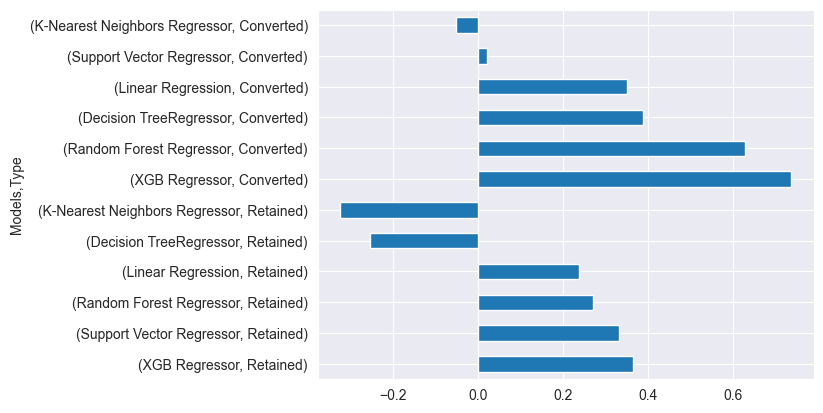

In [48]:
overall['R2_Scores'].plot(kind='barh')

You could see that XGB Regressor where we Converted the columns to categorical have performed way better compared to if we retained the values. with an R2 score of 73.57% indicating the model represent 73.57% of the variables represent the variations in the model. If we compare it with the retained values, it has performed almost twice as much better as well. We can try improving upon this by doing hyperparameters for the XGB Regressor. However for the purpose of this study, we will stick with this base model.